# Task 3b Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
nJy_to_es = {'f435w': 0.005171303179169625, 'f606w': 0.011015393095414123, 'f775w': 0.005142804319487919, 'f850lp': 0.0024366884234595892, 'f105w': 0.008863392873279346, 'f125w': 0.008550667128846823, 'f140w': 0.010490592077764458, 'f160w': 0.006582638416409025}

In [3]:
filters = ['f435w','f606w', 'f775w','f850lp', 'f105w','f125w','f140w','f160w']

In [4]:
cat = pickle.load(open('data/cat.p', 'rb'))  # read in signal catalogue

In [5]:
fluxes = {f: cat[f'{f}_signal']/nJy_to_es[f] for f in filters} # convert to flux/nJy
errors = {f: cat[f'{f}_noise']/nJy_to_es[f] for f in filters}

In [6]:
r1 = fluxes['f105w']/fluxes['f125w'] # break colour (mag) - usually on y-axis
r2 = fluxes['f850lp']/fluxes['f105w'] # slope colour (mag) - usually on x-axis

--- plot all objects

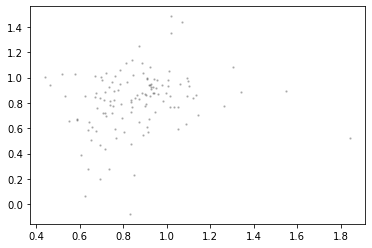

In [7]:
plt.scatter(r1, r2, s=2, c='k', alpha=0.2)

--- define objects meeting the selection according to the criteria given in the script

In [8]:
SN_limit = 10.
s_flux = (fluxes['f160w']/errors['f160w']>SN_limit)

In [9]:
opt_SN_limit = 2.
s_opt = (fluxes['f435w']/errors['f435w']<2)&(fluxes['f606w']/errors['f606w']<2)&(fluxes['f775w']/errors['f775w']<2)

In [10]:
c_cut = (0.75, 0.4)
s_col = (r1>c_cut[0]) & (r2<c_cut[1])

In [11]:
s = s_flux & s_opt & s_col # --- combine all selections together

---Plot selection window and any objects that fall inside window

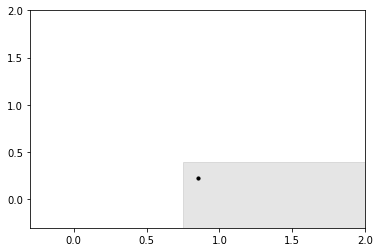

In [12]:
plt.scatter(r1[s], r2[s], s=10, c='k')
plt.fill_between([c_cut[0], 5], [c_cut[1]]*2, [-2]*2, color='k', alpha=0.1)
plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()

--- print the segmentation map IDs of the candidates

In [13]:
id = np.arange(r1.size)+1

In [14]:
print(f'ids = {id[s]}')

ids = [83]
